# The Sparks Foundation- GRIP Internship Jan-Feb 2022

## Data Science & Business Analytics Intern 
---

##### Created By JOVAN MANN
---

# Task 3: Exploratory Data Analysis- Retail Superstore
---

## Background:

A superstore selling products however it has recently noticed that there has been a dip in sales and costs are rising. The business manager is curious as to why this is and ways to identify the core problem. This superstore sells various products such as furniture, technology and office supplies across states in the US. We have been given the sales and other data such as profits.  

Attribute information: 

1. Ship Mode- 
2. Segment
3. Country
4. City
5. State
6. Postcodal
7. Region
8. Category
9. Sub-category
10. Sales
11. Quantity 
12. Discount 
13. Profit

## Possible Questions To Ask

1. Which category is the most popular?
2. Which product from the sub-category has been purchased the most?
3. Is there a relationship between certain products bought depending on location?
4. Does the way in which these products are delivered make a difference to the sales?
5. Ways to increase sales?
6. Ways to increase profits by potentially lowering costs? 

## Problem Statement 

***//Trying to find ways in which to increase sales and profit, potential ways in which to lower costs and other extensive analysis. What are the weak areas in the business?\\***

In depth on each analysis for each category to explore problems and ways in which the business can be improved. 

# 1- Importing/Installing Relevant Libraries and Modules

In [69]:
pip install lux-api # data visualisation module installed

Note: you may need to restart the kernel to use updated packages.


In [70]:
import requests
import pandas as pd
import numpy as np 
import scipy as sp
import sklearn as sk
from pandas.plotting import scatter_matrix
import lux
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import seaborn as sns
import warnings 

# 2- Loading The Dataset From CSV File

## Dataset:

In [71]:
# obtaining the relevant dataset of the Iris Plants

dataset = "/Users/jovan/Desktop/SampleSuperstore.csv"

In [72]:
dataset = pd.read_csv(dataset) #get the keys for each column and distinct variables
dataset.keys()

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [73]:
dataset # prints out the dataset 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [74]:
dataset.head() # gives the first 5 rows of data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [75]:
print(dataset.shape) # 13 features in data and 9994 rows of different transactions each representing different keys

(9994, 13)


In [76]:
dataset.info() # tells us what sort of data type this dataset consists of

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [77]:
dataset.isnull().values.any()

False

In [78]:
dataset.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# 3- Data Cleaning

In [79]:
dataset.duplicated().values.any() # This tells whether there are any duplicates in our dataset, now we look into it

True

In [80]:
dataset.duplicated().sum() # There are 17 duplicates in the dataset which can be dropped from the dataset.

17

In [81]:
dataset=dataset.drop_duplicates() # dropping duplicates from the dataset

In [82]:
dataset.describe() 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [83]:
print(dataset.shape) # we see that now there are 9977 rows and the duplicate rows from the dataset have been dropped

(9977, 13)


In [84]:
dataset.nunique() # this gives the unique number of rows after removing the duplicates. 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Removing Unnecessary Columns From Data

In this dataset, we can observe from the unique columns that there is only 1 country (USA) so that information in the dataset does not help the analysis therefore it can be removed. The postal code is also information that is not requried as it is too specific into each individual order/customer whhich does not help as we already have a collection represented through city or state therefore that can also be removed. 

In [85]:
# removing 'country' and 'postal code' from dataset.

dataset= dataset.drop(['Country', 'Postal Code'], axis=1)

In [86]:
dataset # we have now dropped 2 columns from the dataset: Dropped: 'Country' and 'Postal Code'

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [87]:
dataset.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


# 4- Data Analysis

In [88]:
# Total Sales
print("Total sales: {}".format(dataset["Sales"].sum()))

# Total Profit
print("Total Profit: {}".format(dataset["Profit"].sum()))



Total sales: 2296195.5903
Total Profit: 286241.4226


In [89]:
dataset.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [90]:
dataset.shape

(9977, 11)

In [91]:
attributes = ['Sales','Quantity','Discount','Profit']
corr_mat = dataset.corr()
corr_mat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

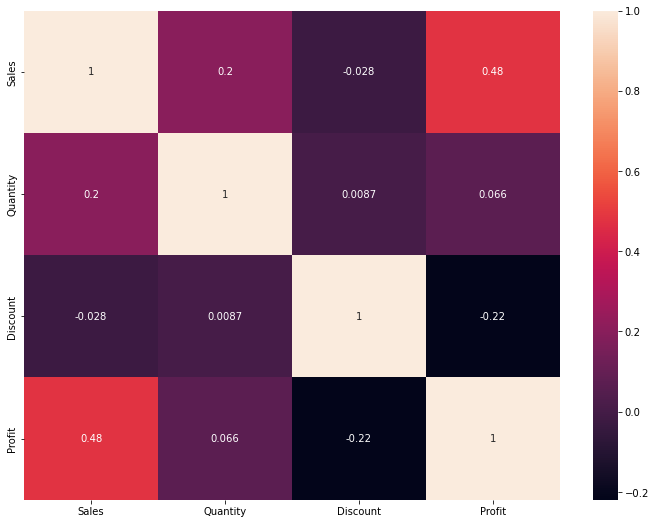

In [92]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.show()

#### From the heatmap we can see that the strongest positive correlation is between sales and profit of +0.48, there is almost no correlation between variables 'Quantity' and 'Discount'. There is also a negative correlation of -0.22 between discount and profit. We could say that as the discount applied to products increases, there is an overall fall in profits. 

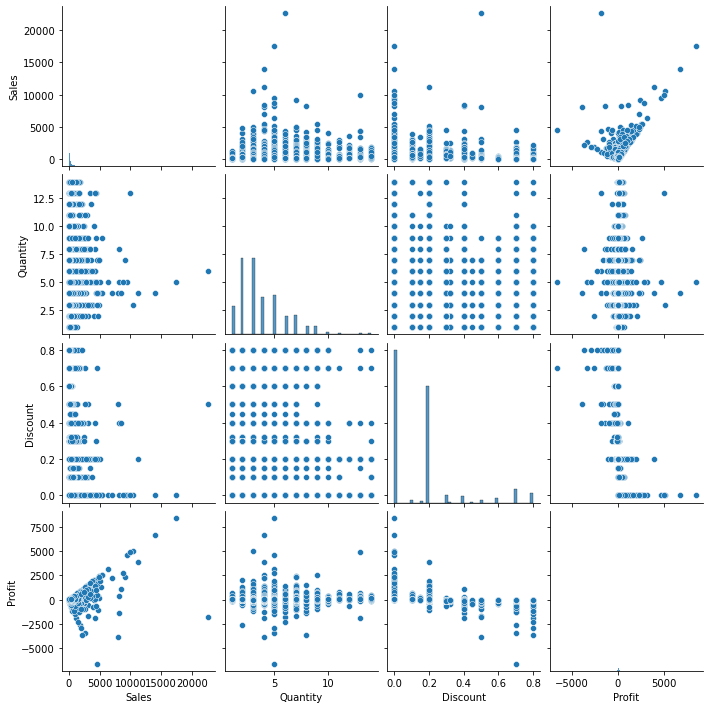

In [93]:
sns.pairplot(dataset)

#### We observe that there is a relationship between variables such as profit, sales and the discount. 
#### 1- As the number of sales increase, this leads to an increase in profit.
#### 2- An increase in the discount, this leads to a fall in profits.
#### 3- An increase in the discount, this leads to a fall in sales.

## Relationship Between Sales And Profits

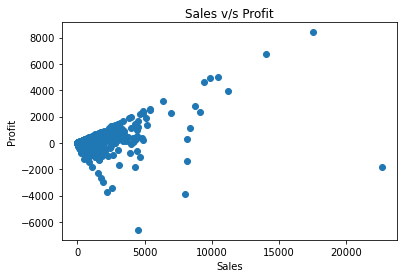

In [94]:
#scatter plot
plt.scatter(dataset['Sales'],dataset['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

In [95]:
# this data gives us the general overview that as sales increase, profits increase as expected with any business. 
# The point to note here is that sales made between 0-5000 leads to a decrease in profits, this could be because of overhead costs
# 0 sales made results in 0 profit but as sales increase to 1000+ profits fall. 

## Profit Analysis

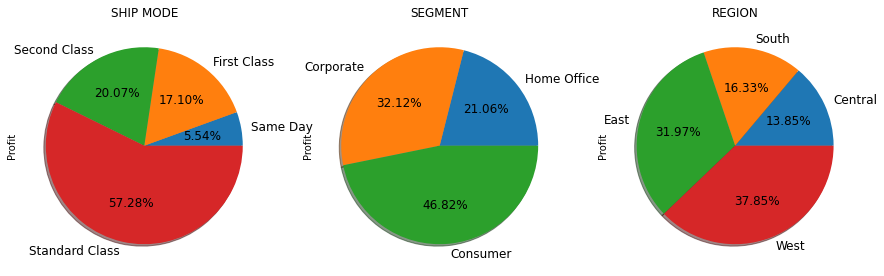

In [101]:
# Plotting Shipmode, Segment, and Region-wise profit
prof_S = pd.DataFrame(dataset.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(dataset.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(dataset.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

In [102]:
# We can see which 'Ship Mode', 'Segment' and 'Region' generates the most profit for the superstore. 
# Largest profits were generated by consumers that order by standard class and in the west region. 
# 'Same day' ship mode generated the least revenue and in the central region. 

## Profit By Category- Which Category Generated The Most And Least Amount Of Profit?

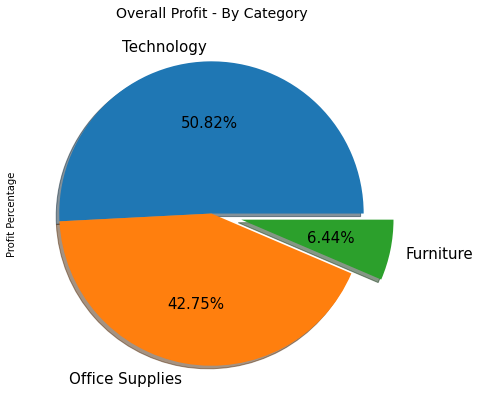

In [103]:
cat = np.round(dataset.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

In [104]:
## Technology category generated 50.82% of all profits with furniture generating the least amount of profit at only 6.44%
## 

## Quantity Of Products Sold By Sub-Category

Total items Sold: 37820


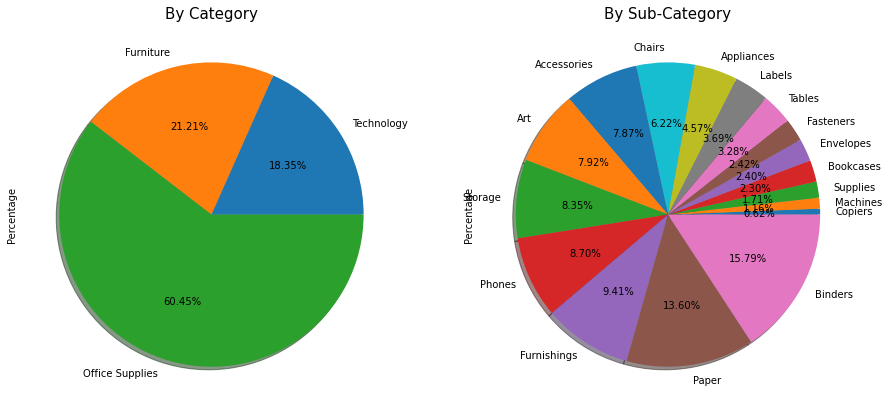

In [107]:
cat = dataset.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = dataset.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {dataset.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)
cat.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

In [108]:
# Total Items sold were 37,820 and around 60% of the products sold were office supplies, therefore generating the most amount of profit
# The top 3 ordered product from the Superstore were Binders, Paper and Furnishings. 

## Products Sold By Category 

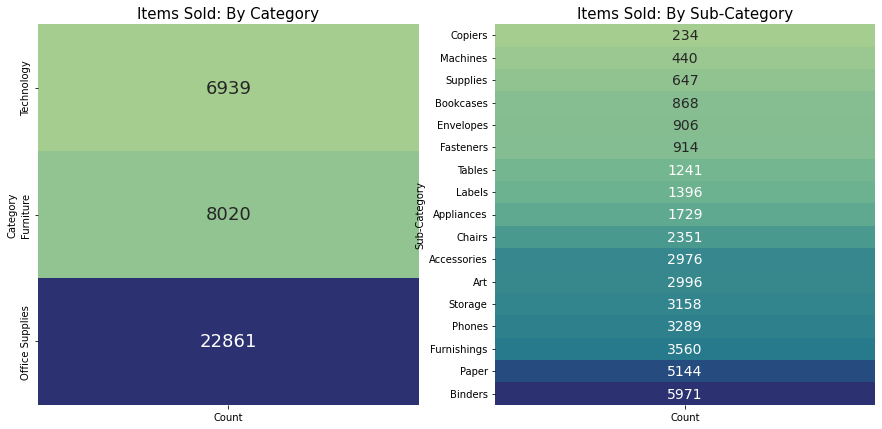

In [110]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, cmap='crest', fmt='2', annot_kws={'size':18})
sns.heatmap(sub, ax=ax[1], annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
plt.show()


Category-wise Summary


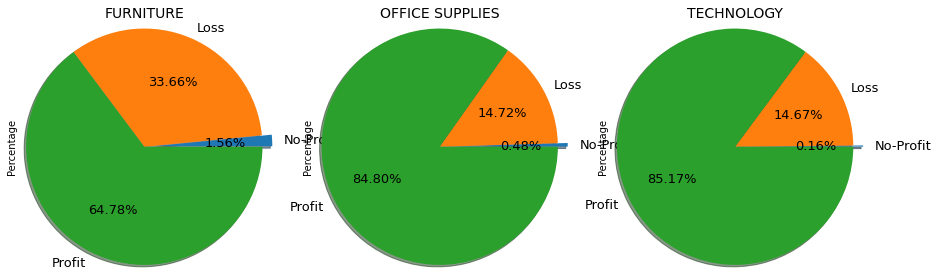

In [111]:
summ_offc = pd.DataFrame({'Profit':dataset[(dataset.Category == 'Office Supplies') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Category == 'Office Supplies') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Category == 'Office Supplies') 
                                    & (dataset.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_furn = pd.DataFrame({'Profit':dataset[(dataset.Category == 'Furniture') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Category == 'Furniture') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Category == 'Furniture') 
                                    & (dataset.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_tech = pd.DataFrame({'Profit':dataset[(dataset.Category == 'Technology') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Category == 'Technology') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Category == 'Technology') 
                                    & (dataset.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,3, figsize=(15,5))
print('Category-wise Summary')
ax[0].set_title('FURNITURE', fontsize=14)
ax[1].set_title('OFFICE SUPPLIES', fontsize=14)
ax[2].set_title('TECHNOLOGY', fontsize=14)
summ_furn.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[0])
summ_offc.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[1])
summ_tech.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[2])
plt.show()

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


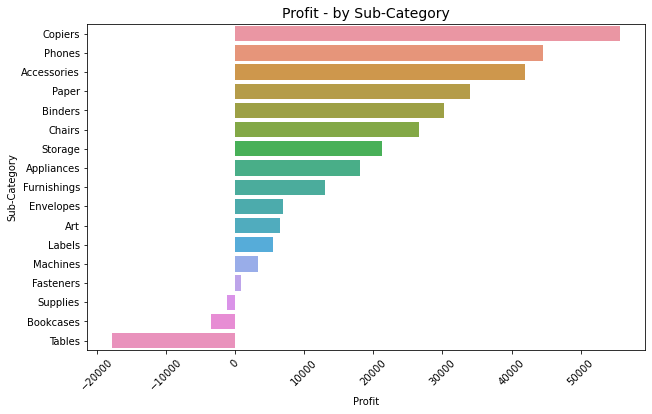

In [112]:
# Sales Summary by Sub-Category
sub = np.round(dataset.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=45)
plt.show()

## Profit By State Analysis

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


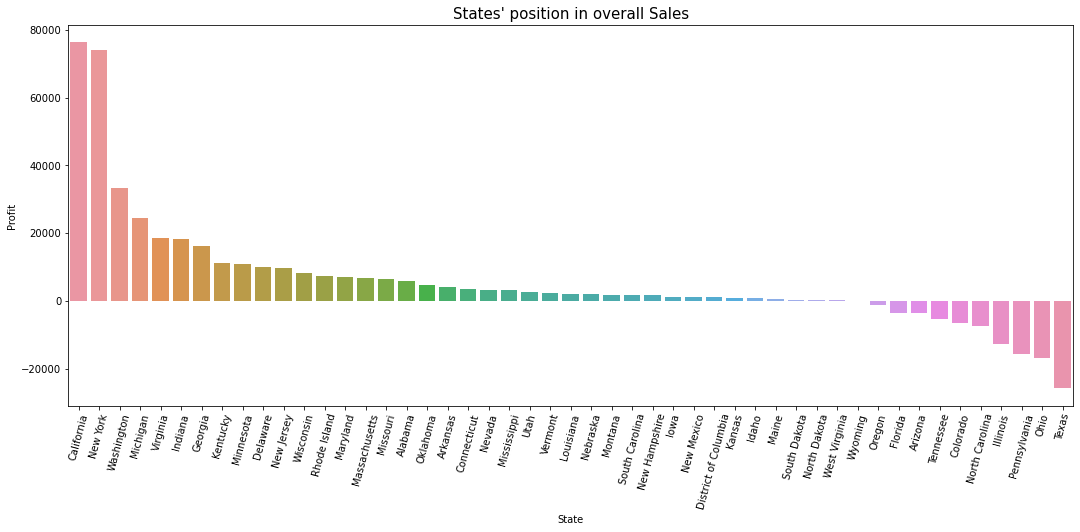

In [113]:
state_P = pd.DataFrame(dataset.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title("States' position in overall Sales", fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

In [114]:
# top 3 most profitable states were California, Ney York and Washington
# the 3 least profitable states were Texas, Ohio and Pennsylvania. 

## Profit By Region Analysis

REGION-WISE SALES SUMMARY


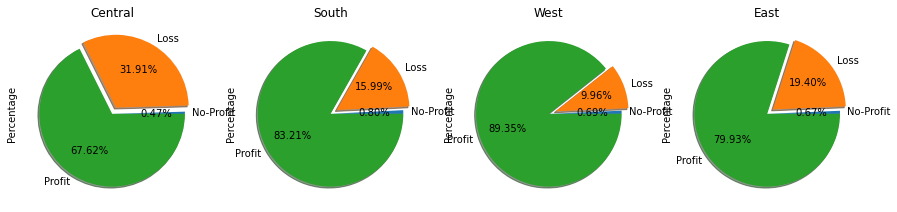

In [115]:
summ_cent = pd.DataFrame({'Profit':dataset[(dataset.Region == 'Central') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Region == 'Central') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Region == 'Central') 
                                    & (-dataset.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_sou = pd.DataFrame({'Profit':dataset[(dataset.Region == 'South') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Region == 'South') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Region == 'South') 
                                    & (-dataset.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_west = pd.DataFrame({'Profit':dataset[(dataset.Region == 'West') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Region == 'West') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Region == 'West') 
                                    & (-dataset.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_east = pd.DataFrame({'Profit':dataset[(dataset.Region == 'East') 
                                        & (dataset.Profit > 0)].count()[0], 
                        'No-Profit':dataset[(dataset.Region == 'East') 
                                         & (dataset.Profit == 0)].count()[0], 
                        'Loss':dataset[(dataset.Region == 'East') 
                                    & (-dataset.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,4, figsize=(15,5))
print('REGION-WISE SALES SUMMARY')
ax[0].set_title('Central')
ax[1].set_title('South')
ax[2].set_title('West')
ax[3].set_title('East')
summ_cent.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[0], explode=(0,0.1,0), shadow=True)
summ_sou.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[1], explode=(0,0.1,0), shadow=True)
summ_west.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[2], explode=(0,0.1,0), shadow=True)
summ_east.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[3], explode=(0,0.1,0), shadow=True)
plt.show()

In [117]:
# Analysis on Sales Loss
loss = np.round(dataset[-(dataset.Profit) > 0], decimals=2).sort_values('Profit')

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


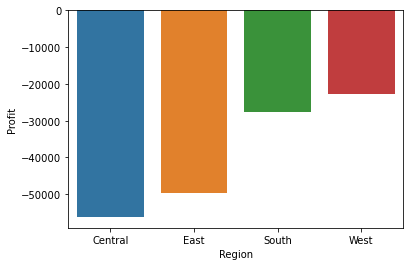

In [118]:
# Sales Loss in each Region
reg_loss = loss.groupby('Region').sum()
sns.barplot(reg_loss.index, reg_loss.Profit)
plt.show()

In [119]:
# central region had the least profit and made the greatest loss on their investments with a return of -55,000

In [120]:
print(f'States with Sales Loss in each Region\n{"-"*37}')
print(f'Central\t:{loss[loss.Region == "Central"].State.unique().tolist()}')
print(f'South\t:{loss[loss.Region == "South"].State.unique().tolist()}')
print(f'West\t:{loss[loss.Region == "West"].State.unique().tolist()}')
print(f'East\t:{loss[loss.Region == "East"].State.unique().tolist()}')

States with Sales Loss in each Region
-------------------------------------
Central	:['Texas', 'Illinois']
South	:['North Carolina', 'Florida', 'Tennessee']
West	:['Colorado', 'Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'New Mexico']
East	:['Ohio', 'Pennsylvania', 'New York', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'West Virginia', 'Delaware', 'Maryland', 'New Jersey', 'Connecticut']


In [121]:
# These states made losses in their own respective regions
# As already identified Illinois and Texas had the greatest sale losses in the central region. 
# the above tells us which region the states that made losses are in.

## Sales Analysis- Office Supplies

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


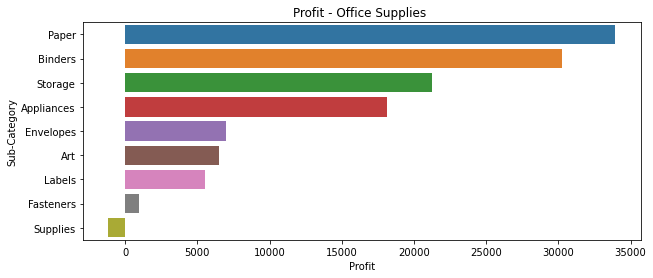

In [122]:
furn = dataset[dataset.Category == 'Office Supplies'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Office Supplies ')
sns.barplot( furn.Profit, furn.index,)
plt.show()

#### Supplies Analysis

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


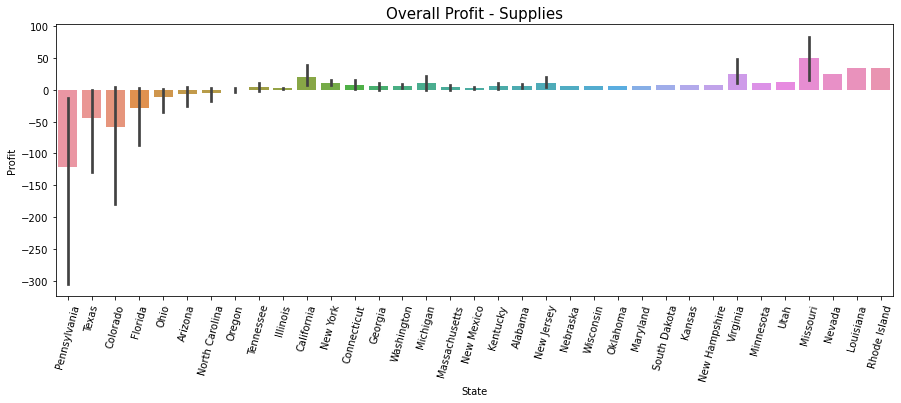

In [124]:
fc = dataset[(dataset['Sub-Category'] == 'Supplies')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Overall Profit - Supplies', fontsize=15)
sns.barplot(fc['State'], fc.Profit)
plt.xticks(rotation=75)
plt.show()

#### Paper Analysis

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


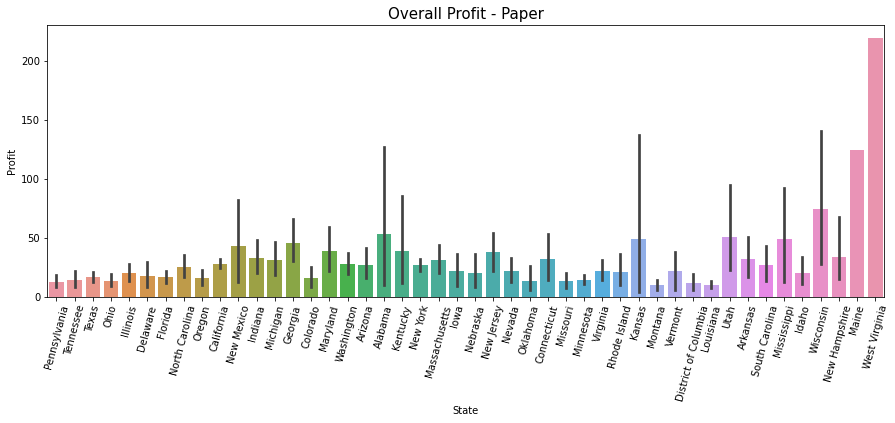

In [125]:
fc = dataset[(dataset['Sub-Category'] == 'Paper')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Overall Profit - Paper', fontsize=15)
sns.barplot(fc['State'], fc.Profit)
plt.xticks(rotation=75)
plt.show()

## Analysis Of Discount And Profit- Impact On Business

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


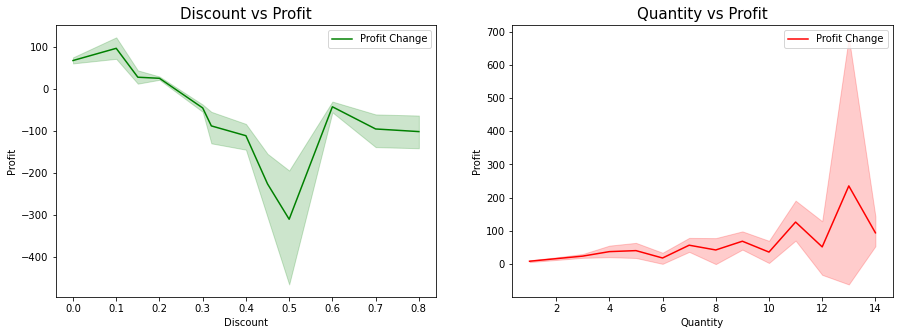

In [131]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)
sns.lineplot(dataset.Discount, dataset.Profit, color='green', label='Profit Change', ax=ax[0])
sns.lineplot(dataset.Quantity, dataset.Profit, color='red', label='Profit Change', ax=ax[1])
plt.show()

/Users/jovan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


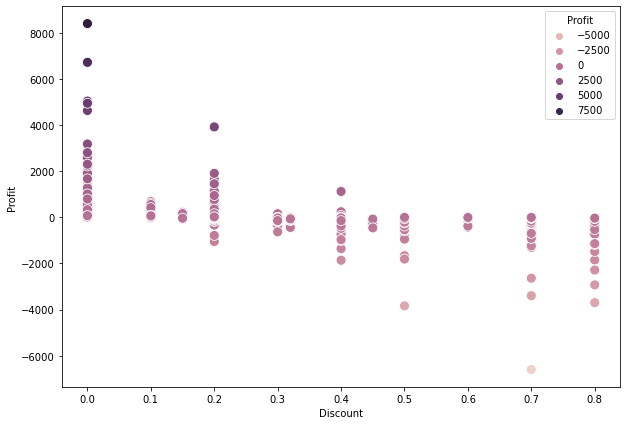

In [133]:
# change in profit when discount is applied

plt.figure(figsize=(10,7))
sns.scatterplot(dataset.Discount, dataset.Profit, hue=dataset.Profit, s=100)
plt.show()

In [134]:
# we can see that as discount is applied for products, the profit falls and this makes sense as higher costs for businesses results in lower profits. 

# 5- Results

1. The profit is in a good range when the discount is minimal, and there is no discount.

2. When discount increases, Sales Loss is increasing and vice versa.

3. Central region facing more loss in sales compared with others.

4. Texas & Illinois are the States where overall sales are in loss and particularly for furniture.

5. Supply of Furniture results in high loss - especially Tables & Bookcases.

6. Texas & Illinois have a loss in some of the Office-Supplies - Binders, Appliances & Storage(& Supplies in Texas).

7. States except Pennsylvania, Texas & Illinois has profit in sales of Chairs & Furnishings.

